In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
data = pd.read_csv('train_data.csv')
data.head()

,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,P784
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,0,254,255,255,254,255,255,255,255,0,...,255,255,255,255,255,255,255,255,255,255
2,0,255,254,255,255,254,255,253,255,254,...,254,255,254,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,255,255,253,...,255,255,255,255,255,255,255,255,255,255


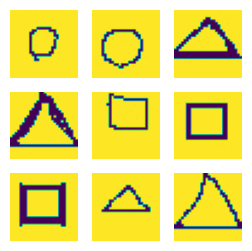

In [123]:
plt.figure(figsize=(3,3))
rows=col = 3
for i in range(9):
    j=np.random.randint(0,200)
    plt.subplot(rows, col, i+1)
    img_arr = data.iloc[j,1:].values.reshape(28,28)
    plt.imshow(img_arr)
    plt.axis('off')

In [124]:
X=data.iloc[:,1:].values.astype('float32')
y=data.iloc[:,0].values.astype('int32')

X = X/255.5

In [125]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y.shape

(200, 3)

In [126]:
X=X.reshape(-1,28,28,1)
X.shape

(200, 28, 28, 1)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.models import Sequential

In [129]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

/Users/bhagya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,083 (492.51 KB)

 Trainable params: 126,083 (492.51 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.fit(X_train, y_train, epochs = 200, validation_split=0.2, verbose=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.3594 - loss: 1.0886 - val_acc: 0.5312 - val_loss: 1.0176
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4385 - loss: 1.0497 - val_acc: 0.5312 - val_loss: 0.9541
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4656 - loss: 0.9932 - val_acc: 0.6250 - val_loss: 0.9113
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.6625 - loss: 0.8849 - val_acc: 0.7500 - val_loss: 0.7819
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.6646 - loss: 0.7943 - val_acc: 0.7500 - val_loss: 0.6613
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7635 - loss: 0.6500 - val_acc: 0.7500 - val_loss: 0.4622
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7969 - loss: 0.5220 - val_acc: 0.8438 - val_loss: 0.3411
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8604 - loss: 0.3766 - val_acc: 0.9375 - val_loss: 0.2012
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9365 - loss: 

In [133]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0090      


[0.013533634133636951, 1.0]